Assignment 16

Load Credit Card Fraud Detection DatasetIdentify the target variable and the feature columns. Check for missing values and handle them appropriately (e.g., using imputation). Split the dataset into training and testing sets (e.g., 80% training, 20% testing). Import the XGBoost library. Train an XGBClassifier using default parameters. Predict the target variable for the test set. Calculate accuracy, precision, recall, F1-score, and the confusion matrix for the predictions. Plot the ROC curve and calculate the AUC score. Modify hyperparameters like n_estimators, learning_rate, max_depth, and subsample. Use GridSearchCV or RandomizedSearchCV to find the best hyperparameter combination. How does learning_rate affect model performance? What is the difference between GridSearchCV and RandomizedSearchCV? Extract feature importance values from the trained model. Plot the top 10 most important features using a bar chart.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv(r"C:\Users\SASWATA\Downloads\loan_data.csv")

In [55]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [59]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [67]:
col=['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [73]:
for i in col:
    df[i]=le.fit_transform(df[i])

In [91]:
cols=['loan_amnt','credit_score','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
for i in cols:
    df[i]=le.fit_transform(df[i])

In [93]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [95]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [101]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 10.1 MB/s eta 0:00:13
   - -------------------------------------- 4.2/124.9 MB 10.1 MB/s eta 0:00:12
   -- ------------------------------------- 6.3/124.9 MB 10.4 MB/s eta 0:00:12
   -- ------------------------------------- 8.7/124.9 MB 10.5 MB/s eta 0:00:12
   --- ------------------------------------ 11.3/124.9 MB 10.8 MB/s eta 0:00:11
   ---- ----------------------------------- 13.9/124.9 MB 11.0 MB/s eta 0:00:11
   ----- ---------------------------------- 16.5/124.9 MB 11.2 MB/s eta 0:00:10
   ----- ---------------------------------- 18.6/124.9 MB 11.1 MB/s eta 0:00:10
   ------ --------------------------------- 21.0/124.9 MB 11.0 MB/s eta 0:00:10
   ------- -------------------------------- 23.6/124.9 MB 11.1 MB/s eta 0:00:10
   -------- ------------------------------- 26.0/124.9 

In [102]:
import xgboost as xgb
dtrain=xgb.DMatrix(x_train,label=y_train)
d_test=xgb.DMatrix(x_test,label=y_test)

In [105]:
params={
    'objective' : 'binary:logistic',
    'eval_metric': 'logloss',
    'eta' : 0.1,
    'max_depth' : 6
}

In [107]:
model=xgb.train(params,dtrain)

In [111]:
y_pred=model.predict(d_test)
y_pred

array([0.13061686, 0.09051367, 0.39931065, ..., 0.09051367, 0.20149566,
       0.73874867], dtype=float32)

In [113]:
y_pred_bin=[]
for i in y_pred:
    if i>0.5:
        y_pred_bin.append(1)
    else:
        y_pred_bin.append(0)

In [115]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(y_test,y_pred_bin))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7033
           1       0.94      0.69      0.80      1967

    accuracy                           0.92      9000
   macro avg       0.93      0.84      0.87      9000
weighted avg       0.92      0.92      0.92      9000



In [121]:
confusion_matrix(y_test,y_pred_bin)

array([[6951,   82],
       [ 614, 1353]], dtype=int64)

In [153]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay,roc_auc_score

In [125]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_bin)

In [127]:
auc=auc(fpr,tpr)

In [139]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc)

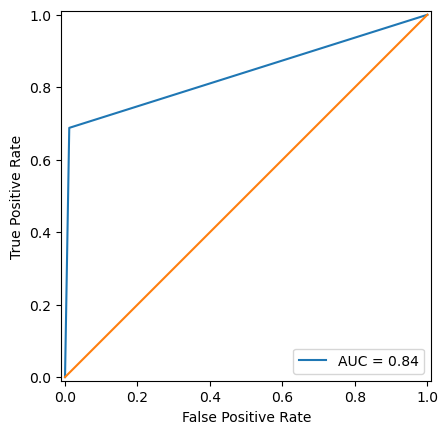

In [163]:
display.plot()
plt.plot([0,1],[0,1])

In [165]:
y_prob=model.predict(d_test)

In [167]:
fpr,tpr,threshold=roc_curve(y_test,y_prob)

In [169]:
auc=roc_auc_score(y_test,y_prob)

Text(0.5, 1.0, 'Roc with probability scores')

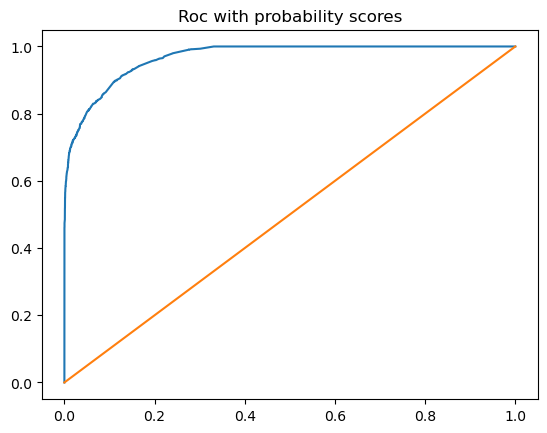

In [174]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title("Roc with probability scores")

Params 1: {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 4, 'subsample': 0.8}, Accuracy: 0.9268
Params 2: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 6, 'subsample': 0.7}, Accuracy: 0.9312
Params 3: {'n_estimators': 150, 'learning_rate': 0.01, 'max_depth': 8, 'subsample': 0.6}, Accuracy: 0.9268
Params 4: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.9}, Accuracy: 0.9313


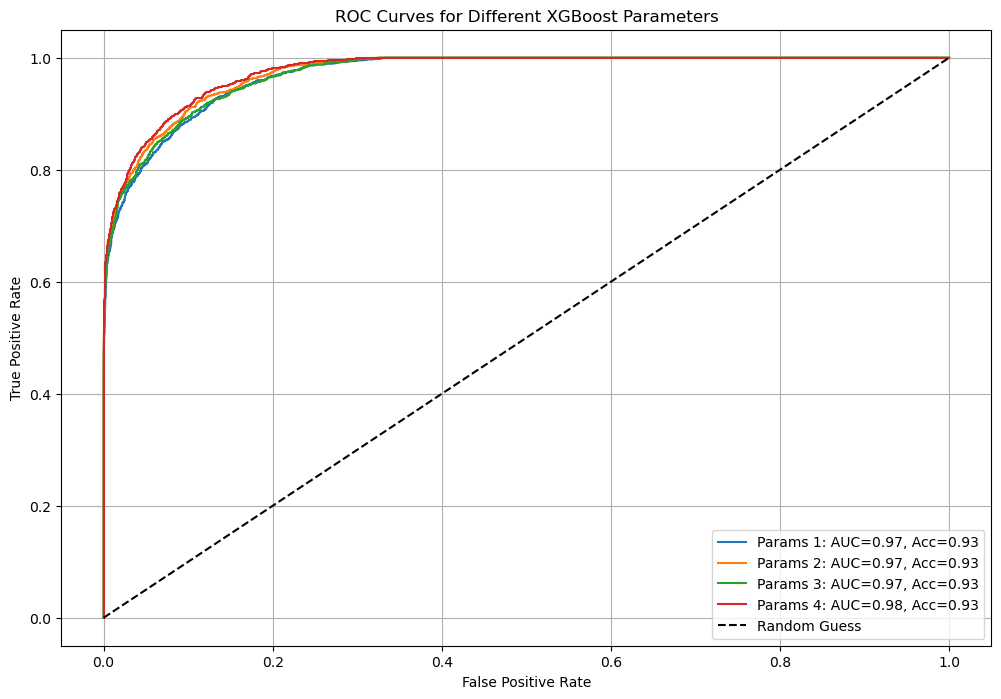

In [180]:
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Parameter grid
param_grid = [
    {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 4, 'subsample': 0.8},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 6, 'subsample': 0.7},
    {'n_estimators': 150, 'learning_rate': 0.01, 'max_depth': 8, 'subsample': 0.6},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.9},
]

plt.figure(figsize=(12, 8))
for i, params in enumerate(param_grid):
    # Set up XGBoost parameters
    xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta': params['learning_rate'],
        'max_depth': params['max_depth'],
        'subsample': params['subsample']
    }

    # Create DMatrix for training
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)

    # Train the model
    bst = xgb.train(xgb_params, dtrain, num_boost_round=params['n_estimators'])

    # Predict probabilities
    y_pred_prob = bst.predict(dtest)
    y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"Params {i+1}: {params}, Accuracy: {accuracy:.4f}")

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"Params {i+1}: AUC={auc_score:.2f}, Acc={accuracy:.2f}")

# Add plot details
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different XGBoost Parameters')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [186]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Fit the model
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=150, s

C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsampl

C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=150, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=7, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=150, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=7, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=150, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.01, max_depth=7, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, 

C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=150, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=7, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=150, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=7, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=150, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.05, max_depth=7, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=150, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=150, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=150, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END learning_rate=0.1, max_depth=7, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=150, subsample=1.0; total time=   0.0s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [188]:
# Get the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best Accuracy: 0.9291111111111111


In [192]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.1s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.1s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.7; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.1s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.1s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.1s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.8; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=50, subsample=1.0; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s


C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\SASWATA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [194]:
# Get the best parameters and accuracy
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_}")

Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best Accuracy: 0.9302777777777779


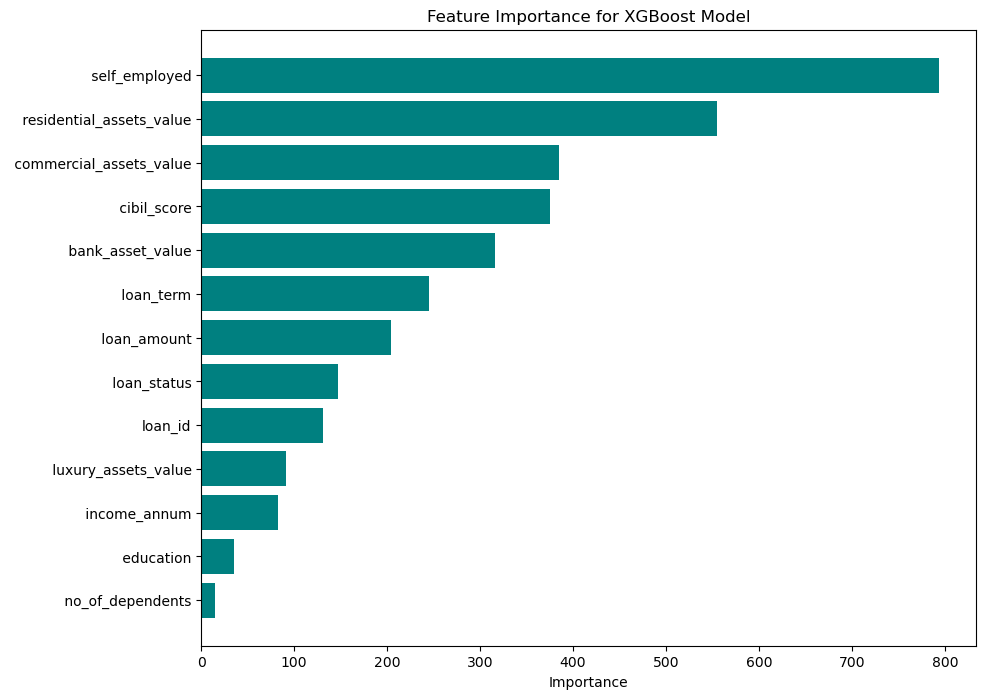

                      Feature  Importance
3               self_employed       794.0
8    residential_assets_value       555.0
9     commercial_assets_value       385.0
7                 cibil_score       375.0
11           bank_asset_value       316.0
6                   loan_term       245.0
5                 loan_amount       204.0
12                loan_status       147.0
0                     loan_id       131.0
10        luxury_assets_value        91.0
4                income_annum        83.0
2                   education        35.0
1            no_of_dependents        15.0


In [196]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

# List of original column names
columns = ['loan_id', ' no_of_dependents', ' education', ' self_employed',
           ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
           ' residential_assets_value', ' commercial_assets_value',
           ' luxury_assets_value', ' bank_asset_value', ' loan_status']

# Create DMatrix for XGBoost, assuming you have the X_train_scaled and y_train
# Train your model (bst) first, or use the existing model.

# Extract feature importance from the trained model
feature_importance = bst.get_score(importance_type='weight')  # You can use 'gain' or 'cover' too

# Map the feature importance to the original column names
importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])

# Map internal feature names like 'f0', 'f1', etc., to the original column names
importance_df['Feature'] = importance_df['Feature'].apply(lambda x: columns[int(x[1:])])  # Assuming f0, f1, etc.

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the importance for all features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance for XGBoost Model')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important features on top
plt.show()

# Optionally, print the full list of feature importance
print(importance_df)

In [ ]:
self employed holds higherst feature importance followed by residentail assets value